# Load some data

In [1]:
import hotstepper as hs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_excel('https://raw.githubusercontent.com/TangleSpace/hotstepper-data/master/data/superstore.xls',
                            parse_dates=['Order Date','Ship Date'])
df_data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


All we need as a start is to usually have the data in a Pandas Dataframe. Fun fact, if you set the field type of a datetime field within the dataframe, either with the parse_dates option when reading a file or explicitly using apply pd.to_datetime directly on the field, when you tell HotStepper to use that field as either a start or end step key, Hotstepper will automatically detect the type and set the use_datetime=True flag for you.

For example,

In [3]:
sales_orders = hs.Steps.read_dataframe(
        df_data, #the dataframe we will read from
        start='Order Date', #field name of the start keys
        end='Ship Date', #field name of the end keys
        weight='Profit') #field name of the weight or value of each step

sales_orders.using_datetime()

True

,Metric,Value
0,Count,1434
1,Mean,761.85
2,Median,513.1
3,Mode,-6927.35
4,Std,1363.45
5,Var,1859001.89
6,Min,-6927.35
7,25%,140.24
8,75%,1195.82
9,Max,11642.96


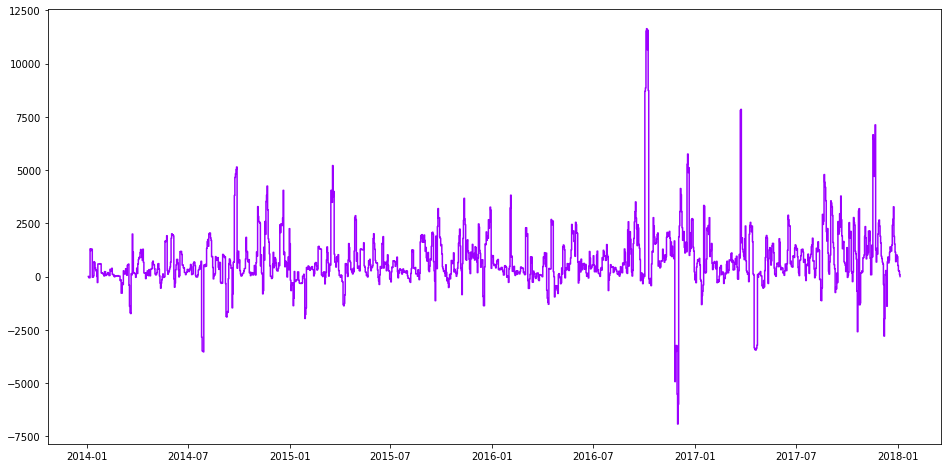

In [4]:
ax = sales_orders.plot()
sales_orders.describe()

We can also load data into a Steps object a few more ways, let's go with a raw example and use the read_array method.

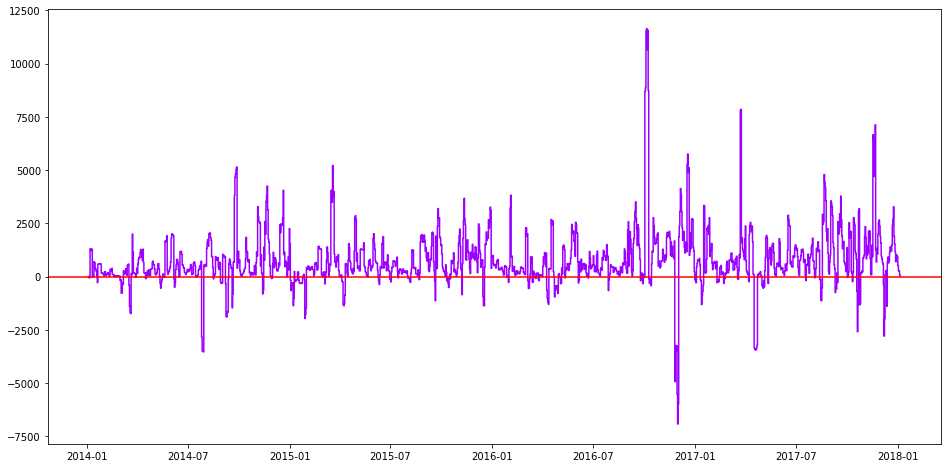

In [5]:
sales_orders_arr = hs.Steps.read_array(
        start=df_data['Order Date'], #array of values for the start keys
        end=df_data['Ship Date'],    #array of values for the end keys
        weight=df_data['Profit'])    #array of values for the step weights or values

ax = sales_orders_arr.plot()
ax.axhline(0,color='r');